In [1]:
import nltk
import pandas as pd
from nltk.tokenize import word_tokenize
from collections import defaultdict
import re


In [2]:

# Download necessary resources
nltk.download('punkt')

# Download the 'punkt_tab' resource
nltk.download('punkt_tab')


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


True

In [3]:

# Load the dataset
file_path = '/content/drive/MyDrive/hin.txt'  # update this path if necessary
data = pd.read_csv(file_path, sep='\t', names=['english', 'hindi'])


In [4]:

# Drop duplicate rows
data.drop_duplicates(inplace=True)


In [5]:

# Normalize text (basic cleanup)
def normalize_english(text):
    text = text.lower()  # lowercasing
    text = re.sub(r'[^a-zA-Z\s]', '', text)  # remove special characters
    return text.strip()


In [6]:

def normalize_hindi(text):
    text = re.sub(r'[^\u0900-\u097F\s]', '', text)  # remove non-Devanagari chars
    return text.strip()


In [7]:

data['english_clean'] = data['english'].apply(normalize_english)
data['hindi_clean'] = data['hindi'].apply(normalize_hindi)


In [8]:

# Tokenization
data['english_tokens'] = data['english_clean'].apply(word_tokenize)
data['hindi_tokens'] = data['hindi_clean'].apply(word_tokenize)


In [9]:

# Preview the data
print(data.head())


  english    hindi english_clean hindi_clean english_tokens hindi_tokens
0   Help!    बचाओ!          help        बचाओ         [help]       [बचाओ]
1   Jump.    उछलो.          jump        उछलो         [jump]       [उछलो]
2   Jump.    कूदो.          jump        कूदो         [jump]       [कूदो]
3   Jump.   छलांग.          jump       छलांग         [jump]      [छलांग]
4  Hello!  नमस्ते।         hello     नमस्ते।        [hello]    [नमस्ते।]


In [10]:
from nltk.probability import FreqDist

# 1. Average Sentence Length
data['eng_len'] = data['english_tokens'].apply(len)
data['hin_len'] = data['hindi_tokens'].apply(len)


In [11]:

avg_eng_len = data['eng_len'].mean()
avg_hin_len = data['hin_len'].mean()

print(f"Average English sentence length: {avg_eng_len:.2f} words")
print(f"Average Hindi sentence length: {avg_hin_len:.2f} words")


Average English sentence length: 6.25 words
Average Hindi sentence length: 6.80 words


In [12]:

# 2. Vocabulary Size
all_english_tokens = [token for tokens in data['english_tokens'] for token in tokens]
all_hindi_tokens = [token for tokens in data['hindi_tokens'] for token in tokens]


In [13]:

vocab_eng = set(all_english_tokens)
vocab_hin = set(all_hindi_tokens)

print(f"English vocabulary size: {len(vocab_eng)}")
print(f"Hindi vocabulary size: {len(vocab_hin)}")


English vocabulary size: 2370
Hindi vocabulary size: 3025


In [14]:

# 3. Word Frequency Distribution
fdist_eng = FreqDist(all_english_tokens)
fdist_hin = FreqDist(all_hindi_tokens)

print("\nMost common English words:")
print(fdist_eng.most_common(10))


Most common English words:
[('the', 792), ('i', 612), ('to', 553), ('you', 529), ('is', 430), ('a', 416), ('he', 381), ('of', 264), ('in', 257), ('my', 191)]


In [15]:


print("\nMost common Hindi words:")
print(fdist_hin.most_common(10))



Most common Hindi words:
[('है।', 685), ('में', 416), ('नहीं', 381), ('मैं', 362), ('वह', 356), ('से', 317), ('क्या', 279), ('के', 278), ('है', 277), ('मुझे', 272)]


In [16]:
!pip install wordcloud matplotlib seaborn


In [17]:
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud


In [18]:

# Set styles
sns.set_theme(style="whitegrid")


In [19]:
!apt-get update
!apt-get install fonts-noto


Hit:1 https://cloud.r-project.org/bin/linux/ubuntu jammy-cran40/ InRelease
Hit:2 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2204/x86_64  InRelease
Get:3 http://security.ubuntu.com/ubuntu jammy-security InRelease [129 kB]
Hit:4 http://archive.ubuntu.com/ubuntu jammy InRelease
Hit:5 https://r2u.stat.illinois.edu/ubuntu jammy InRelease
Get:6 http://archive.ubuntu.com/ubuntu jammy-updates InRelease [128 kB]
Hit:7 https://ppa.launchpadcontent.net/deadsnakes/ppa/ubuntu jammy InRelease
Hit:8 https://ppa.launchpadcontent.net/graphics-drivers/ppa/ubuntu jammy InRelease
Hit:9 https://ppa.launchpadcontent.net/ubuntugis/ppa/ubuntu jammy InRelease
Hit:10 http://archive.ubuntu.com/ubuntu jammy-backports InRelease
Get:11 http://archive.ubuntu.com/ubuntu jammy-updates/main amd64 Packages [3,153 kB]
Get:12 http://archive.ubuntu.com/ubuntu jammy-updates/restricted amd64 Packages [4,272 kB]
Fetched 7,682 kB in 5s (1,568 kB/s)
Reading package lists... Done
W: Skipping acquire of config

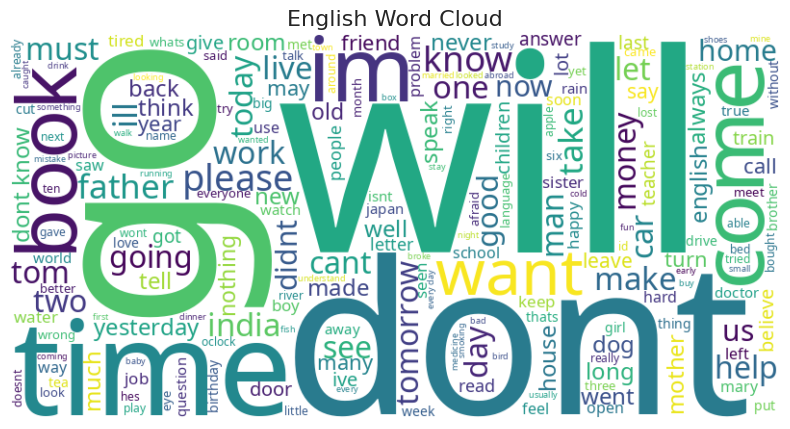

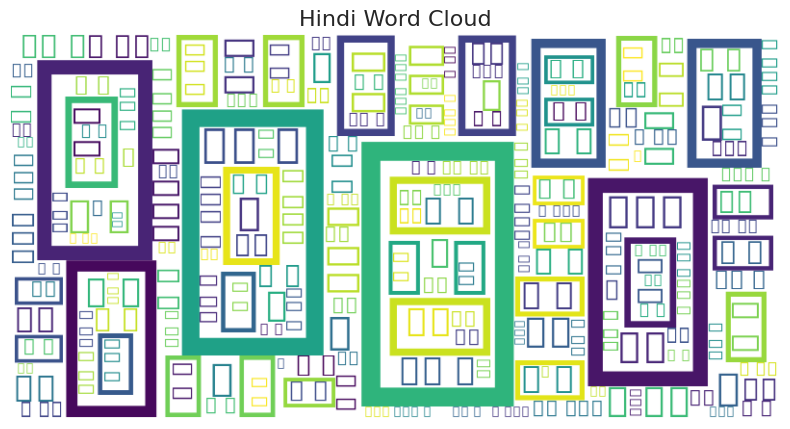

In [20]:


# 1. Word Clouds
def plot_wordcloud(words, title):
    text = ' '.join(words)
    # Use Noto Sans (a widely available font that supports Devanagari)
    # If this doesn't work, make sure the font is installed and the path is correct.
    wordcloud = WordCloud(width=800, height=400, background_color='white', font_path='/usr/share/fonts/truetype/noto/NotoSans-Regular.ttf').generate(text)
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title(title, fontsize=16)
    plt.show()

plot_wordcloud(all_english_tokens, "English Word Cloud")
plot_wordcloud(all_hindi_tokens, "Hindi Word Cloud")

<ipython-input-21-57b0ea11fbc0>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=list(counts), y=list(words), palette="viridis")


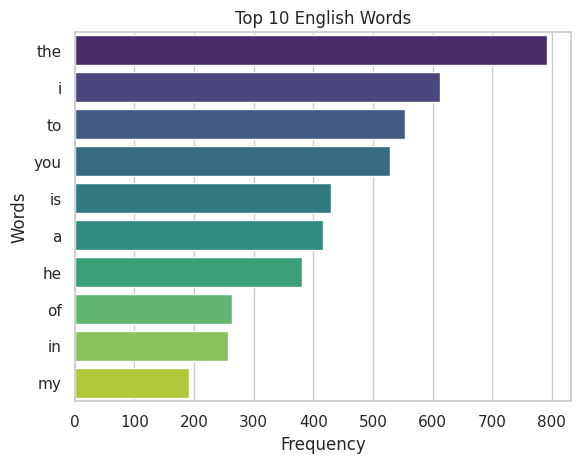

<ipython-input-21-57b0ea11fbc0>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=list(counts), y=list(words), palette="viridis")
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 2361 (\N{DEVANAGARI LETTER HA}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Matplotlib currently does not support Devanagari natively.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 2376 (\N{DEVANAGARI VOWEL SIGN AI}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 2404 (\N{DEVANAGARI DANDA}) missing fro

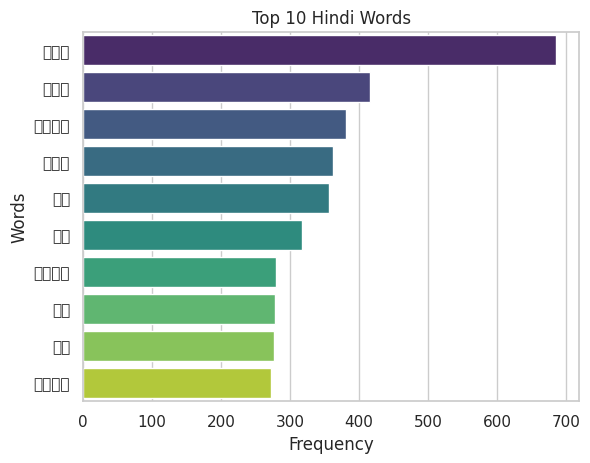

In [21]:

# 2. Bar Plots of Most Common Words
def plot_top_words(freq_dist, title):
    most_common = freq_dist.most_common(10)
    words, counts = zip(*most_common)
    sns.barplot(x=list(counts), y=list(words), palette="viridis")
    plt.title(title)
    plt.xlabel("Frequency")
    plt.ylabel("Words")
    plt.show()

plot_top_words(fdist_eng, "Top 10 English Words")
plot_top_words(fdist_hin, "Top 10 Hindi Words")


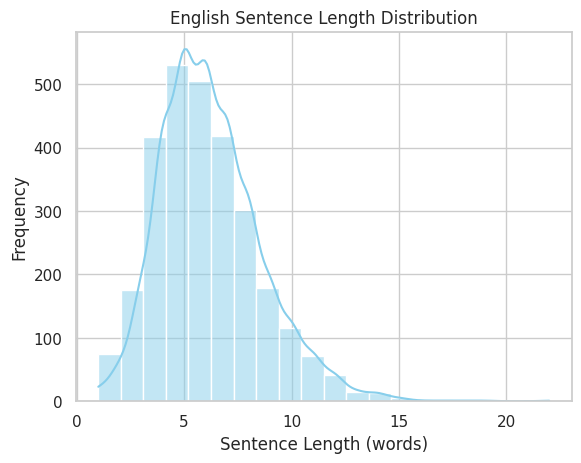

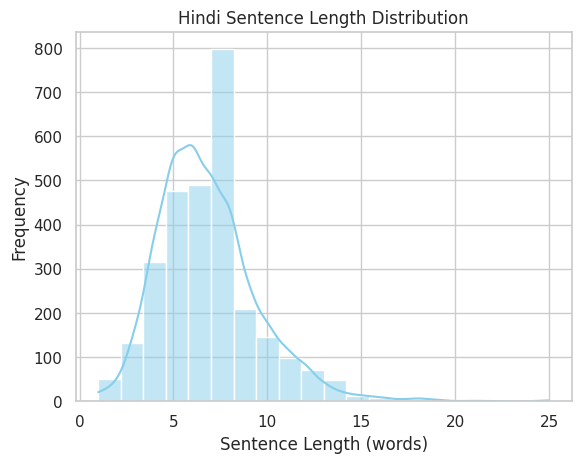

In [22]:

# 3. Sentence Length Histograms
def plot_length_distribution(lengths, title):
    sns.histplot(lengths, kde=True, bins=20, color="skyblue")
    plt.title(title)
    plt.xlabel("Sentence Length (words)")
    plt.ylabel("Frequency")
    plt.show()

plot_length_distribution(data['eng_len'], "English Sentence Length Distribution")
plot_length_distribution(data['hin_len'], "Hindi Sentence Length Distribution")


In [23]:
from nltk.corpus import stopwords
from nltk import pos_tag
import nltk
import pandas as pd
from nltk.tokenize import word_tokenize
from collections import defaultdict
import re


In [24]:
nltk.download('punkt')
# Download the 'punkt_tab' resource
nltk.download('punkt_tab')
# Download stopwords and tagging model
nltk.download('stopwords')
# Download the 'averaged_perceptron_tagger' resource specifically for English
nltk.download('averaged_perceptron_tagger_eng')  # This line was missing/incorrect


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger_eng to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger_eng is already up-to-
[nltk_data]       date!


True

In [25]:

# 1. English Stopwords
stopwords_eng = set(stopwords.words('english'))


In [26]:

# Count stopwords in each English sentence
data['english_stopwords'] = data['english_tokens'].apply(lambda tokens: [t for t in tokens if t in stopwords_eng])


In [27]:

# Common stopwords frequency
from nltk.probability import FreqDist
fdist_eng_sw = FreqDist([word for tokens in data['english_stopwords'] for word in tokens])

print("Top 10 English stopwords in the dataset:")
print(fdist_eng_sw.most_common(10))


Top 10 English stopwords in the dataset:
[('the', 792), ('i', 612), ('to', 553), ('you', 529), ('is', 430), ('a', 416), ('he', 381), ('of', 264), ('in', 257), ('my', 191)]


POS Tag Meanings:

NN: Noun, singular or mass

NNS: Noun, plural

VBD: Verb, past tense

PRP: Personal pronoun

In [28]:

# 2. English POS Tagging
# Apply POS tagging to a small sample
sample_tokens = data['english_tokens'].iloc[5:10]
for i, tokens in enumerate(sample_tokens):
    print(f"\nSentence {i+1} POS Tags:")
    print(pos_tag(tokens))



Sentence 1 POS Tags:
[('hello', 'NN')]

Sentence 2 POS Tags:
[('cheers', 'NNS')]

Sentence 3 POS Tags:
[('cheers', 'NNS')]

Sentence 4 POS Tags:
[('got', 'VBD'), ('it', 'PRP')]

Sentence 5 POS Tags:
[('im', 'NN'), ('ok', 'NN')]


In [29]:
# 1. Sentence Length Ratio
data['len_ratio'] = data['hin_len'] / data['eng_len']


In [30]:

# Show statistics
print("Sentence Length Ratio Stats:")
print(data['len_ratio'].describe())


Sentence Length Ratio Stats:
count    2869.000000
mean        1.122279
std         0.295655
min         0.250000
25%         1.000000
50%         1.000000
75%         1.272727
max         3.500000
Name: len_ratio, dtype: float64


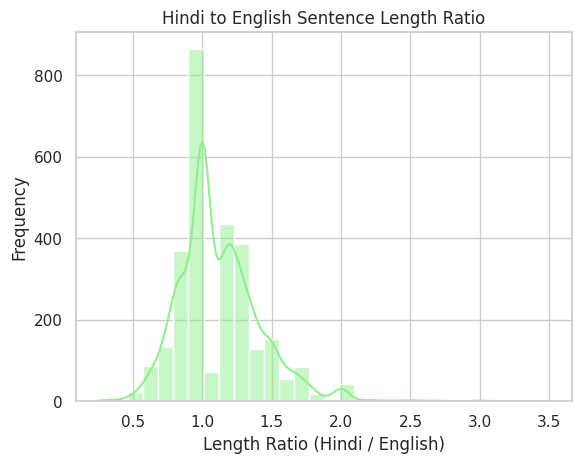

In [31]:

# Visualize
import seaborn as sns
import matplotlib.pyplot as plt

sns.histplot(data['len_ratio'], bins=30, kde=True, color="lightgreen")
plt.title("Hindi to English Sentence Length Ratio")
plt.xlabel("Length Ratio (Hindi / English)")
plt.ylabel("Frequency")
plt.show()


In [32]:

# Flag possible misaligned translations
threshold_low, threshold_high = 0.5, 2.0  # you can adjust
misaligned = data[(data['len_ratio'] < threshold_low) | (data['len_ratio'] > threshold_high)]
print(f"Potential misaligned translations: {len(misaligned)}")


Potential misaligned translations: 20


In [33]:
!pip install numpy --upgrade --force-reinstall

  Using cached numpy-2.2.5-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (62 kB)
Using cached numpy-2.2.5-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (16.4 MB)
  Attempting uninstall: numpy
    Found existing installation: numpy 1.26.4
    Uninstalling numpy-1.26.4:
      Successfully uninstalled numpy-1.26.4
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
gensim 4.3.3 requires numpy<2.0,>=1.18.5, but you have numpy 2.2.5 which is incompatible.
numba 0.60.0 requires numpy<2.1,>=1.22, but you have numpy 2.2.5 which is incompatible.
tensorflow 2.18.0 requires numpy<2.1.0,>=1.26.0, but you have numpy 2.2.5 which is incompatible.


In [34]:
!pip install gensim --upgrade --force-reinstall

  Using cached gensim-4.3.3-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (8.1 kB)
  Using cached numpy-1.26.4-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (61 kB)
  Using cached scipy-1.13.1-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (60 kB)
  Using cached smart_open-7.1.0-py3-none-any.whl.metadata (24 kB)
  Using cached wrapt-1.17.2-cp311-cp311-manylinux_2_5_x86_64.manylinux1_x86_64.manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (6.4 kB)
Using cached gensim-4.3.3-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (26.7 MB)
Using cached numpy-1.26.4-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (18.3 MB)
Using cached scipy-1.13.1-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (38.6 MB)
Using cached smart_open-7.1.0-py3-none-any.whl (61 kB)
Using cached wrapt-1.17.2-cp311-cp311-manylinux_2_5_x86_64.manylinux1_x86_64.manylinux_2_17_x86_64.manylinux2014_x86_64.whl (83 kB)
  Att

In [36]:
from gensim.models import FastText

# Get English sentences from the DataFrame
english_sentences = data['english_tokens'].tolist()
# Get Hindi sentences from the DataFrame
hindi_sentences = data['hindi_tokens'].tolist()

# Train FastText on English
fasttext_eng = FastText(sentences=english_sentences, vector_size=100, window=5, min_count=2, workers=4)
fasttext_eng.save("fasttext_english.model")

# Train FastText on Hindi
fasttext_hin = FastText(sentences=hindi_sentences, vector_size=100, window=5, min_count=2, workers=4)
fasttext_hin.save("fasttext_hindi.model")

In [37]:
pip install sentence-transformers


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 43.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 44.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 46.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 14.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 8.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 6.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 39.2 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.5.82
    Uninstalling nvidia-nvjitlink-cu12-12.5.82:
      Successfully uninstalled nvidia-nvjitlin

In [38]:
from sentence_transformers import SentenceTransformer

# Load a multilingual sentence embedding model
model = SentenceTransformer('sentence-transformers/LaBSE')

# Example: encode English and Hindi sentences
english_embeds = model.encode(data['english_clean'].tolist())
hindi_embeds = model.encode(data['hindi_clean'].tolist())

# Compare similarity between first pair
from sklearn.metrics.pairwise import cosine_similarity
similarity = cosine_similarity([english_embeds[0]], [hindi_embeds[0]])
print("Cosine similarity of first sentence pair:", similarity[0][0])


/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


modules.json:   0%|          | 0.00/461 [00:00<?, ?B/s]

config_sentence_transformers.json:   0%|          | 0.00/122 [00:00<?, ?B/s]

README.md:   0%|          | 0.00/2.02k [00:00<?, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/804 [00:00<?, ?B/s]

Xet Storage is enabled for this repo, but the 'hf_xet' package is not installed. Falling back to regular HTTP download. For better performance, install the package with: `pip install huggingface_hub[hf_xet]` or `pip install hf_xet`


model.safetensors:   0%|          | 0.00/1.88G [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/397 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/5.22M [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/9.62M [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/190 [00:00<?, ?B/s]

Xet Storage is enabled for this repo, but the 'hf_xet' package is not installed. Falling back to regular HTTP download. For better performance, install the package with: `pip install huggingface_hub[hf_xet]` or `pip install hf_xet`
Xet Storage is enabled for this repo, but the 'hf_xet' package is not installed. Falling back to regular HTTP download. For better performance, install the package with: `pip install huggingface_hub[hf_xet]` or `pip install hf_xet`


config.json:   0%|          | 0.00/114 [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/2.36M [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/2.36M [00:00<?, ?B/s]

Cosine similarity of first sentence pair: 0.55934215


~0.56 suggests:

There's a moderate semantic similarity between the English sentence and its Hindi translation.



In [39]:
from sentence_transformers import SentenceTransformer
from sklearn.metrics.pairwise import cosine_similarity
import os

# === USER INPUTS ===
input_text_path = '/content/drive/MyDrive/hin.txt'     # Replace with your text file path
output_labels_path = 'labels.txt'        # Where you want to store 1s and 0s
threshold = 0.7                          # Cosine similarity threshold for correctness

# === LOAD MODEL ===
print("Loading LaBSE model...")
model = SentenceTransformer('sentence-transformers/LaBSE')

# === READ TEXT DATA ===
print(f"Reading data from {input_text_path}...")
english_sentences = []
hindi_sentences = []

with open(input_text_path, 'r', encoding='utf-8') as f:
    for line in f:
        if '\t' in line:
            eng, hin = line.strip().split('\t')
            english_sentences.append(eng)
            hindi_sentences.append(hin)

# === ENCODE SENTENCES ===
print("Encoding sentences...")
english_embeddings = model.encode(english_sentences, convert_to_numpy=True)
hindi_embeddings = model.encode(hindi_sentences, convert_to_numpy=True)

# === COMPUTE COSINE SIMILARITY AND LABEL ===
print("Computing similarities...")
labels = []
for eng_emb, hin_emb in zip(english_embeddings, hindi_embeddings):
    sim = cosine_similarity([eng_emb], [hin_emb])[0][0]
    label = 1 if sim >= threshold else 0
    labels.append(str(label))

print(f"Saving labels to {output_labels_path}...")
with open(output_labels_path, 'w', encoding='utf-8') as out_file:
    out_file.write('\n'.join(labels))

print("Done! Labels saved.")


Loading LaBSE model...
Reading data from /content/drive/MyDrive/hin.txt...
Encoding sentences...
Computing similarities...
Saving labels to labels.txt...
Done! Labels saved.


In [41]:
from sentence_transformers import SentenceTransformer
from sklearn.metrics.pairwise import cosine_similarity

# Load model
model = SentenceTransformer('sentence-transformers/LaBSE')

# Load text data
with open('/content/drive/MyDrive/hin.txt', 'r', encoding='utf-8') as f:
    english_sentences = [line.strip() for line in f]

with open('/content/drive/MyDrive/hin.txt', 'r', encoding='utf-8') as f:
    hindi_sentences = [line.strip() for line in f]

# Encode sentences
english_embeddings = model.encode(english_sentences)
hindi_embeddings = model.encode(hindi_sentences)

# Generate predicted labels using cosine similarity threshold
predicted_labels = []
for eng_vec, hin_vec in zip(english_embeddings, hindi_embeddings):
    similarity = cosine_similarity([eng_vec], [hin_vec])[0][0]
    label = 1 if similarity >= 0.7 else 0
    predicted_labels.append(label)

# Save predicted labels to a new file
with open('/content/predicted_labels.txt', 'w') as f:
    for label in predicted_labels:
        f.write(str(label) + '\n')

print("✅ Predicted labels saved to /content/predicted_labels.txt")


✅ Predicted labels saved to /content/predicted_labels.txt


In [42]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Load true and predicted labels
with open('/content/labels.txt', 'r') as f:
    true_labels = [int(line.strip()) for line in f]

with open('/content/predicted_labels.txt', 'r') as f:
    predicted_labels = [int(line.strip()) for line in f]

# Sanity check
assert len(true_labels) == len(predicted_labels), "Mismatch in number of labels!"

# Calculate metrics
accuracy = accuracy_score(true_labels, predicted_labels)
precision = precision_score(true_labels, predicted_labels, zero_division=0)
recall = recall_score(true_labels, predicted_labels, zero_division=0)
f1 = f1_score(true_labels, predicted_labels, zero_division=0)

# Print results
print("📊 Evaluation Metrics:")
print(f"✅ Accuracy:  {accuracy:.4f}")
print(f"✅ Precision: {precision:.4f}")
print(f"✅ Recall:    {recall:.4f}")
print(f"✅ F1 Score:  {f1:.4f}")


📊 Evaluation Metrics:
✅ Accuracy:  0.9442
✅ Precision: 0.9442
✅ Recall:    1.0000
✅ F1 Score:  0.9713


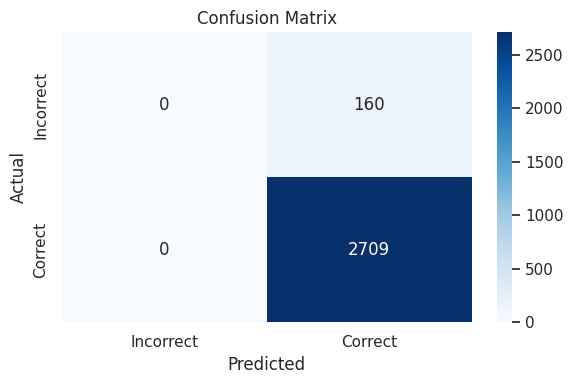

In [43]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Load true and predicted labels
with open('/content/labels.txt', 'r') as f:
    true_labels = [int(line.strip()) for line in f]

with open('/content/predicted_labels.txt', 'r') as f:
    predicted_labels = [int(line.strip()) for line in f]

# Compute confusion matrix
cm = confusion_matrix(true_labels, predicted_labels)

# Plotting
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["Incorrect", "Correct"], yticklabels=["Incorrect", "Correct"])
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.tight_layout()
plt.show()
